<a href="https://colab.research.google.com/github/ShreniPatel2003/Deep_Learning_Projects/blob/main/Pytorch_Handdigit_Classification_(Shreni_Patel_sem_7_DS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
# Define a simple neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 20)
        self.fc2 = nn.Linear(20, 15)
        self.fc3 = nn.Linear(15, 10)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [ ]:
# Load the MNIST dataset and apply transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)


100%|██████████| 9912422/9912422 [00:00<00:00, 77528295.24it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 72018842.94it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 27751927.72it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 14111502.79it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
# Initialize the network, loss function, and optimizer
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)


In [ ]:
# Training the network
for epoch in range(80):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs = inputs.view(-1, 28*28)

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(trainloader)}')

print('Finished Training')

Epoch 1, Loss: 0.5840722267826398
Epoch 2, Loss: 0.33049386310776074
Epoch 3, Loss: 0.2907535817121466
Epoch 4, Loss: 0.2716595986545086
Epoch 5, Loss: 0.2559870046099027
Epoch 6, Loss: 0.2455584034581979
Epoch 7, Loss: 0.23771281133194763
Epoch 8, Loss: 0.23010915602644286
Epoch 9, Loss: 0.22637265260219575
Epoch 10, Loss: 0.21997289480169613
Epoch 11, Loss: 0.21691893679201604
Epoch 12, Loss: 0.21170227830807367
Epoch 13, Loss: 0.2100878950054447
Epoch 14, Loss: 0.2061930285339554
Epoch 15, Loss: 0.20478603695482014
Epoch 16, Loss: 0.20242491519749164
Epoch 17, Loss: 0.19999212657262883
Epoch 18, Loss: 0.20038672930772106
Epoch 19, Loss: 0.19572919191320737
Epoch 20, Loss: 0.19517680765340725
Epoch 21, Loss: 0.19241810242384672
Epoch 22, Loss: 0.19179204222510257
Epoch 23, Loss: 0.18983297753433387
Epoch 24, Loss: 0.1901184204051892
Epoch 25, Loss: 0.18803455502217015
Epoch 26, Loss: 0.18433633538434901
Epoch 27, Loss: 0.183884705606848
Epoch 28, Loss: 0.18279726697355508
Epoch 29, L

In [16]:
#Evaluation on the test set
correct = 0
total = 0
y_pred = []

with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.view(-1, 28*28)
        outputs = net(images)
        predicted = torch.max(outputs.data, 1)[1]  # Extract the tensor indices
        y_pred.extend(predicted)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the test images: {100 * correct / total:.2f}%')

Accuracy of the network on the test images: 94.59%


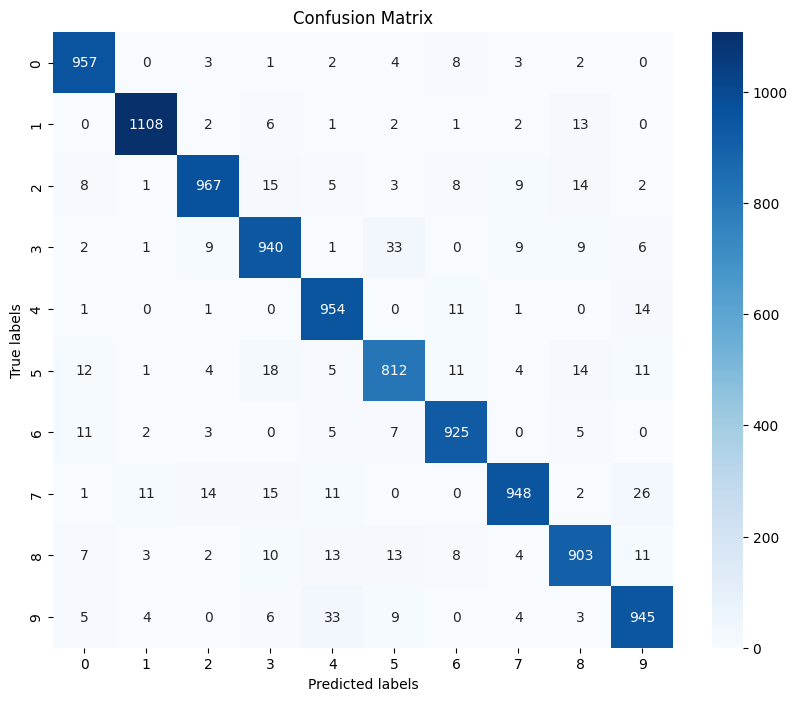

In [17]:
# Creating and plotting the confusion matrix
conf_matrix = confusion_matrix(testset.targets, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()